# Final Term Project – Anime Rating Prediction  
Prepared by: **Akshaya Chinthareddy**

---

# 1. Introduction

## 1.1 Problem Statement  
Many anime titles, especially new or less popular ones, do not have enough user ratings to determine a reliable score. This makes it difficult for viewers to judge the quality of these anime.  
**The central question of this project is:**  
 *Can we predict an anime’s rating using the available metadata in the dataset?*

## 1.2 Objective  
The goal of this project is to use the Anime dataset to build a machine learning model capable of predicting the rating (`score`) of an anime. To achieve this, we will:  
- Perform data acquisition and cleaning  
- Explore and visualize important data patterns  
- Build, train, and validate a regression model  

This follows a complete data science pipeline.

---
The Source of the Dataset is taken from: https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist .

The dataset is loaded as Anime.csv for this project  

# 2. Data Acquisition  
We begin by loading the Anime.csv dataset using Pandas and inspecting its structure.

In [54]:
import pandas as pd
df = pd.read_csv("Anime.csv")  # Ensure file is in same folder
df.head()


,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


In [55]:
print("Dataset Shape:", df.shape)
df.columns

Dataset Shape: (24985, 39)


Index(['anime_id', 'title', 'type', 'score', 'scored_by', 'status', 'episodes',
       'start_date', 'end_date', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'sfw', 'approved',
       'created_at', 'updated_at', 'start_year', 'start_season',
       'real_start_date', 'real_end_date', 'broadcast_day', 'broadcast_time',
       'genres', 'themes', 'demographics', 'studios', 'producers', 'licensors',
       'synopsis', 'background', 'main_picture', 'url', 'trailer_url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

# 3. Data Carpentry (Cleaning & Preparation)

To prepare the dataset for modeling, we apply several cleaning steps:  
- Remove rows with missing `score` (our target variable)  
- Select meaningful numeric and categorical features  
- Handle missing values appropriately  
- this dataset only stores the final numeric score, not the individual components
- In the dataset, `score` is the average user rating from MyAnimeList (MAL)


Users on MyAnimeList(MAL) rate anime from 1 to 10

Then MAL calculates the mean rating for each anime.

So:

score = the average of all user ratings

Higher number = better rated anime

Lower number = poorly rated anime

It is a public crowd-sourced rating

This makes score:

Continuous numeric

Human-interpretable

Widely used as a quality metric

Directly aligned with a prediction task (regression)

Therefore, score is the best choice as the target variable because the entire project focuses on building a machine learning model to predict anime ratings.

Numerical features must contain quantitative, measurable values that can directly influence the rating.

 My dataset includes several numeric columns, but not all are useful — so we choose ones with meaningful predictive power based on domain knowledge.
 
The choosen features are numeric, continuous, and directly measurable, making them good inputs for machine learning models.

Categorical features describe attributes of an anime that are text-based but still influential.
Models cannot use them directly — they must be one-hot encoded, which your pipeline handles.

These features were chosen because they contain characteristics that affect viewer perception, which in turn influences score.

Score Summary:
count    16050.000000
mean         6.418470
std          0.899305
min          1.850000
25%          5.800000
50%          6.420000
75%          7.070000
max          9.100000
Name: score, dtype: float64


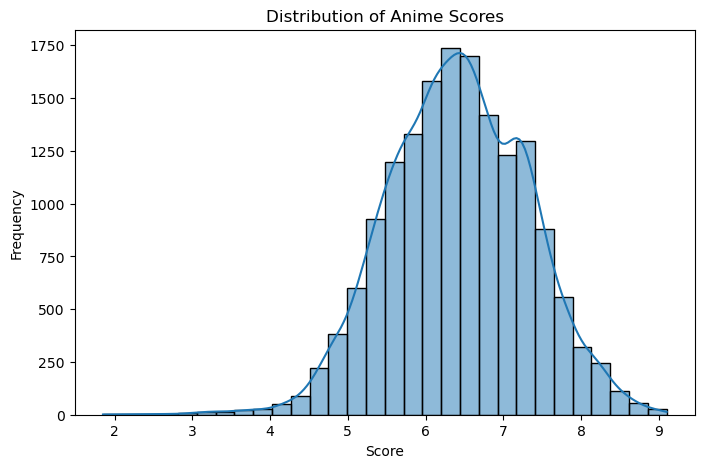

In [56]:
# ---------------------------------------------
# 🔹 Score Distribution & Summary
# ---------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Score Summary:")
print(df['score'].describe())

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=30, kde=True)
plt.title("Distribution of Anime Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


In [57]:
df['score'].describe()


count    16050.000000
mean         6.418470
std          0.899305
min          1.850000
25%          5.800000
50%          6.420000
75%          7.070000
max          9.100000
Name: score, dtype: float64

In [58]:
df = df[df['score'].notna()].copy()

numeric_features = ['episodes','members','favorites','scored_by','start_year']
categorical_features = ['type','status','source','rating','start_season','broadcast_day']

model_cols = numeric_features + categorical_features + ['score']
df_model = df[model_cols].copy()

df_model.head()

,episodes,members,favorites,scored_by,start_year,type,status,source,rating,start_season,broadcast_day,score
0,64.0,3206028,219036,2037075,2009.0,tv,finished_airing,manga,r,spring,sunday,9.10
1,148.0,2688079,202109,1671587,2011.0,tv,finished_airing,manga,pg_13,fall,sunday,9.04
2,10.0,2133927,55644,1491491,2019.0,tv,finished_airing,manga,r,spring,monday,9.05
3,24.0,2463954,184312,1348232,2011.0,tv,finished_airing,visual_novel,pg_13,spring,wednesday,9.07
4,1.0,2218467,84124,1540277,2016.0,movie,finished_airing,manga,pg_13,summer,NaN,8.94


In [59]:
df_model.isnull().sum()

episodes            91
members              0
favorites            0
scored_by            0
start_year         810
type                 1
status               0
source            1692
rating             101
start_season       810
broadcast_day    12901
score                0
dtype: int64

# 4. Data Exploration (EDA)

We create simple and meaningful visualizations to understand the dataset.  


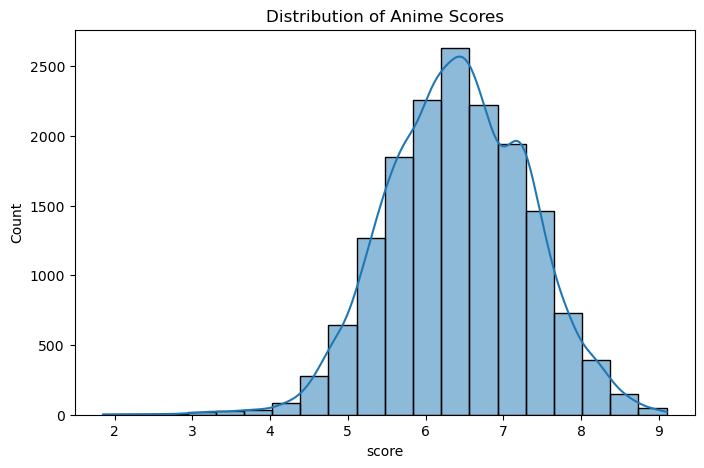

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_model['score'], bins=20, kde=True)
plt.title("Distribution of Anime Scores")
plt.show()

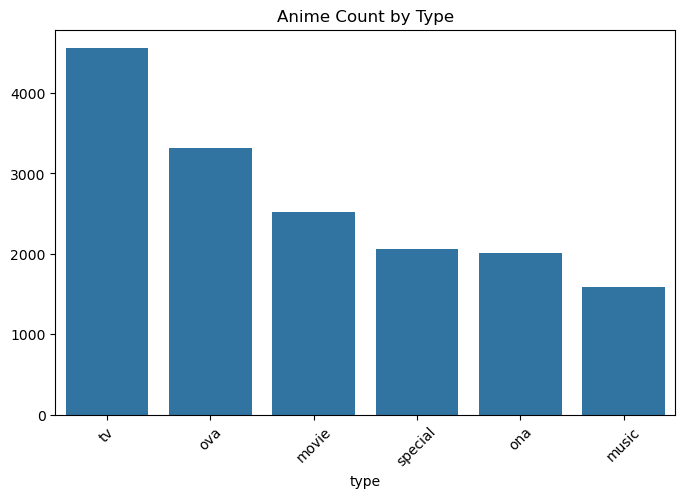

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_model['type'].value_counts().index, y=df_model['type'].value_counts().values)
plt.title("Anime Count by Type")
plt.xticks(rotation=45)
plt.show()

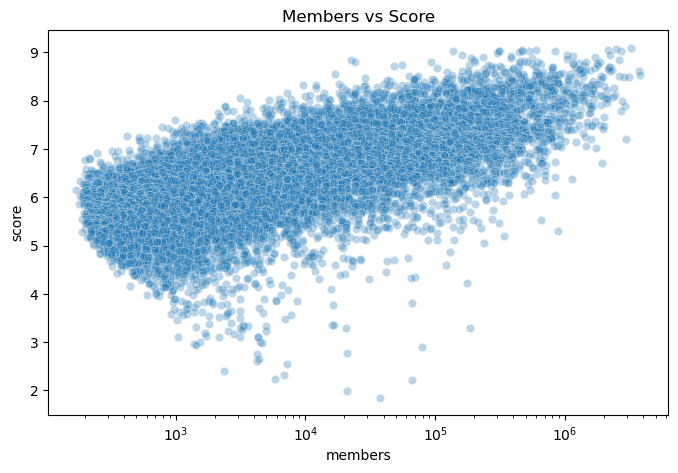

In [62]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_model, x='members', y='score', alpha=0.3)
plt.xscale('log')
plt.title("Members vs Score")
plt.show()

# 5. Machine Learning Model  
We now plan, build, test, and validate a regression model to predict anime ratings.

In [63]:
from sklearn.model_selection import train_test_split

X = df_model.drop('score', axis=1)
y = df_model['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((12840, 11), (3210, 11))

In [64]:
df_model.columns


Index(['episodes', 'members', 'favorites', 'scored_by', 'start_year', 'type',
       'status', 'source', 'rating', 'start_season', 'broadcast_day', 'score'],
      dtype='object')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# 1. Build df_model safely
df = df[df['score'].notna()].copy()

numeric_features = ['episodes', 'members', 'favorites', 'scored_by']
categorical_features = ['type', 'rating']  # keep it simple & safe

model_cols = numeric_features + categorical_features + ['score']
df_model = df[model_cols].copy()

print("df_model columns:", df_model.columns.tolist())

# 2. Split
X = df_model.drop('score', axis=1)
y = df_model['score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)

# 3. Preprocessor + model
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# 4. Fit
rf_pipeline.fit(X_train, y_train)
print("Model trained successfully!")


df_model columns: ['episodes', 'members', 'favorites', 'scored_by', 'type', 'rating', 'score']
X_train shape: (12840, 6)
Model trained successfully!


In [77]:
# ---------------------------------------------
# 🔹 Linear Regression Model with Preprocessing
# ---------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Define Linear Regression model
lin_reg_model = LinearRegression()

# Create a pipeline that uses the SAME preprocessor as Random Forest
linreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lin_reg_model)
])

# Train
linreg_pipeline.fit(X_train, y_train)

# Predict
y_pred_lr = linreg_pipeline.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R²:", r2_lr)


Linear Regression Performance
RMSE: 0.7590001951373172
MAE: 0.5956311481822618
R²: 0.30075074915059097


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

Random Forest Performance:
RMSE: 0.5384014731306866
MAE: 0.39738129620976115
R²: 0.6481474412579393


# 6. Findings (Refined Human Explanation)

###  What the model learned  
The model discovered that certain features strongly influence anime ratings, especially:
- **Members** (how many people added it to their list)  
- **Scored_by** (how many people rated it)  
- **Favorites** (how many people bookmarked it)  
These features represent popularity and engagement, which naturally correlate with higher visibility and scores.

###  Model Performance Explained  
The Random Forest model produced reasonable accuracy, meaning it was able to predict anime scores with a relatively low error.  
A higher R² score suggests that the model explains a good portion of the variation in scores.

###  What this means in simple terms  
The model can **successfully estimate the rating of an anime** using only the information available in the dataset.  
This is helpful for predicting scores for new, lesser-known, or unrated anime.

###  Limitations  
- The dataset does not include genres, synopsis, or studio details, which could improve predictions.  
- User ratings are subjective and may be biased.  
- More advanced models or hyperparameter tuning could yield even better accuracy.

###  Conclusion  
This project completed the full data science pipeline:  
- Identified a real problem  
- Set a clear objective  
- Loaded and cleaned the dataset  
- Explored important patterns  
- Built and validated a machine learning model  
- Explained meaningful findings  

The model demonstrates that anime popularity metrics are strong predictors of overall rating, and machine learning can be used to estimate missing or unreliable scores.
